<a href="https://colab.research.google.com/github/EdgaRojas/MachineLearning/blob/main/Unidad2/4_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas de Soporte para Regresión (SVR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("asesinatos.csv", encoding='latin-1')
df.head()

,Estado,id_area,habitantes,area_km2,ingresos_medios,edad_media_poblacion,densidad_poblacional,indice_gini,tasa_desempleo_juvenil,porcentaje_sin_diploma_secundaria,porcentaje_hogares_monoparentales,gasto_policial_per_capita,inversion_programas_sociales_per_capita,tiempo_respuesta_emergencias_min,porcentaje_zonas_verdes,tasa_asesinatos_por_100mil
0,Puebla,1,207953,26.70,48018,40.8,7787.47,0.522,21.8,30.3,40.0,867,240,3.0,5.0,27.1
1,Durango,2,80226,17.39,50295,42.4,4612.66,0.346,19.2,18.9,23.5,706,458,3.0,11.1,13.6
2,Tabasco,3,260806,70.69,50795,39.5,3689.22,0.417,23.0,33.5,23.8,981,403,4.3,8.1,20.6
3,Baja California Sur,4,969508,830.49,68910,27.3,1167.39,0.399,28.8,17.7,23.5,951,326,7.5,16.1,18.5
4,Aguascalientes,5,69478,30.59,54248,36.2,2271.26,0.422,16.4,33.6,27.6,563,353,7.2,10.6,16.8


In [4]:
X = df[['indice_gini', 'tasa_desempleo_juvenil', 'ingresos_medios', 'porcentaje_sin_diploma_secundaria']]
y = df['tasa_asesinatos_por_100mil']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [7]:
svr_model = SVR(kernel='rbf', C=100, epsilon=0.2)
svr_model.fit(X_train_scaled, y_train_scaled)


SVR(C=100, epsilon=0.2)

In [8]:
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse_svr:.2f}")
print(f"Coeficiente de determinación (R²): {r2_svr:.2f}")

Error cuadrático medio (MSE): 11.17
Coeficiente de determinación (R²): 0.45


In [9]:

rmse = np.sqrt(mse_svr)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")

Raíz del Error cuadrático medio (RMSE): 3.34


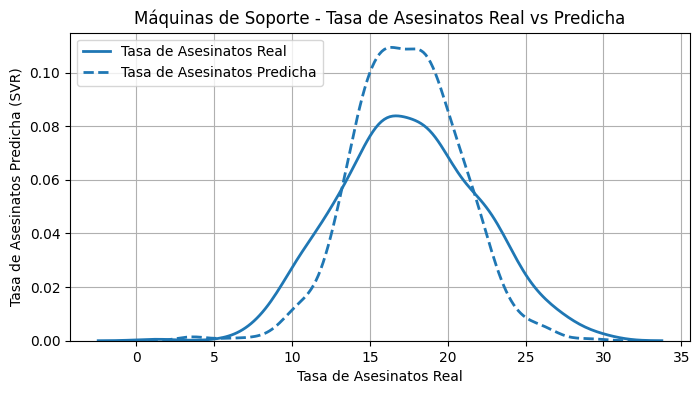

In [11]:
#plt.scatter(y_test, y_pred, color='purple')
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Tasa de Asesinatos Real', linewidth=2)
sns.kdeplot(y_pred, label='Tasa de Asesinatos Predicha', linewidth=2, linestyle='--')
plt.xlabel("Tasa de Asesinatos Real")
plt.ylabel("Tasa de Asesinatos Predicha (SVR)")
plt.title("Máquinas de Soporte - Tasa de Asesinatos Real vs Predicha")
plt.grid(True)
plt.legend()
plt.show()

In [29]:
svr_model = SVR(kernel='linear', C=100, epsilon=0.2)
svr_model.fit(X_train_scaled, y_train_scaled)


SVR(C=100, epsilon=0.2, kernel='linear')

In [30]:
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse_svr:.2f}")
print(f"Coeficiente de determinación (R²): {r2_svr:.2f}")

Error cuadrático medio (MSE): 9.03
Coeficiente de determinación (R²): 0.55


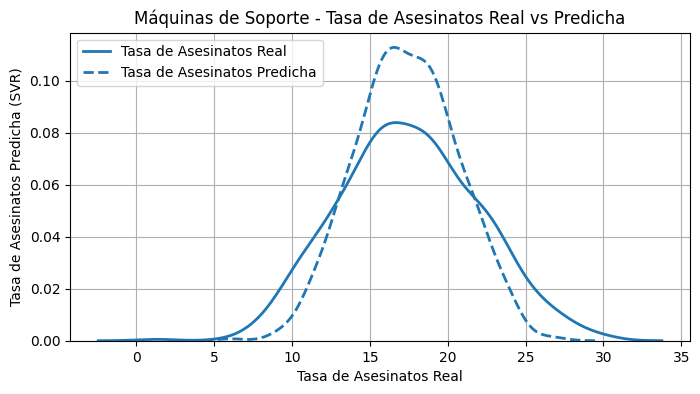

In [31]:
#plt.scatter(y_test, y_pred, color='purple')
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Tasa de Asesinatos Real', linewidth=2)
sns.kdeplot(y_pred, label='Tasa de Asesinatos Predicha', linewidth=2, linestyle='--')
plt.xlabel("Tasa de Asesinatos Real")
plt.ylabel("Tasa de Asesinatos Predicha (SVR)")
plt.title("Máquinas de Soporte - Tasa de Asesinatos Real vs Predicha")
plt.grid(True)
plt.legend()
plt.show()

## En este algoritmo usando el kernel linear obtuve un porcentaje igaul al algoritmo de regresion lineal multiple lo unico que sucedio fue que el error cuadratico medio disminuyo 0.03, el coeficiente se mantuvo en 55%